#Homework 3
##Rafael Barrera Quiroz C.C. 1035433047

###Realize numerically gradient descent method on the "data.csv" which represent some linear regression problem (fitting)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data=pd.read_csv('data.txt',sep=',',header=None)

In [3]:
data

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


###Visualization data

In [4]:
data_pd=data.to_numpy()
X_data=data_pd[:,0]
y_data=data_pd[:,1]

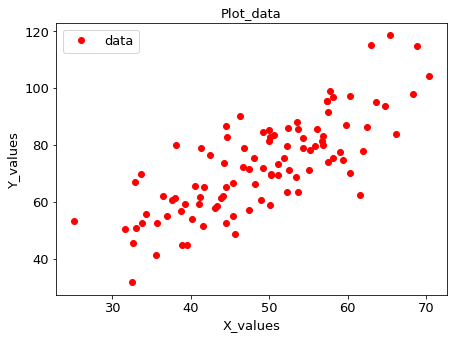

In [5]:
figure(figsize=(7,5))
plt.plot(X_data,y_data,'ro',label='data')
plt.xlabel('X_values',fontsize=13)
plt.ylabel('Y_values',fontsize=13)
plt.title('Plot_data',fontsize=13)
plt.tick_params(labelsize=13)
plt.legend(fontsize=13)
plt.show()

###El cálculo de las funciones $MSE$, $MAE$ y $MAPE$ se logra a través de las siguientes formulas:
$$MSE = \frac{1}{m}\sum_{i=1}^{m}[y_i-h_\theta(x_i)]^2$$
$$MAE=\frac{1}{m}\sum_{i=1}^{m}|y_i-h_\theta(x_i)|$$
$$MAPE=\frac{100}{m}\sum_{i=1}^{m}|\frac{y_i-h_\theta(x_i)}{y_i}|$$
###Donde $h_\theta$ está dado por:
$$h_\theta(x_i)=\theta_1x_i+\theta_0$$

In [6]:
theta_0=10 #Inicialización tetha_0
theta_1=10 #Inicialización tetha_1
alpha=0.0001 #taza de aprendizaje
epochs=100 #Número de iteraciónes
m=len(X_data)
its=0
MSE_value=[]
MAE_value=[]
MAPE_value=[]
while its<epochs:
  MSE=sum([(y_data[i]-(theta_1*X_data[i]+theta_0))**2 for i in range(len(X_data))])/m #MSE formula
  MSE_value.append(MSE)
  MAE=sum([abs(y_data[i]-(theta_1*X_data[i]+theta_0)) for i in range(len(X_data))])/m #MAE formula
  MAE_value.append(MAE)
  MAPE=(100*sum([abs((y_data[i]-(theta_1*X_data[i]+theta_0))/y_data[i]) for i in range(len(X_data))]))/m #MAPE formula
  MAPE_value.append(MAPE)
  Sum1=sum([(theta_1*X_data[i]+theta_0)-y_data[i] for i in range(len(X_data))])
  Sum2=sum([((theta_1*X_data[i]+theta_0)-y_data[i])*X_data[i] for i in range(len(X_data))])
  p1=(alpha*Sum1)/m
  p2=(alpha*Sum2)/m
  theta_0=theta_0-p1
  theta_1=theta_1-p2
  its+=1
print('theta_0=',theta_0,'theta_1=',theta_1)

theta_0= 9.82804170362346 theta_1= 1.2863249401990895


In [7]:
def func(x, a1, a0):
    return a1 * x + a0

p0=np.array([10.0,10.0])
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, X_data, y_data, p0, method='lm')
print('theta_0=',popt[1],'theta_1=',popt[0])

theta_0= 7.991020921164858 theta_1= 1.3224310239237007


De acuerdo a los valores obtenidos para $\theta_0$ y $\theta_1$, tanto por el método del descenso del gradiente, como del ajuste con scipy optimize, se encuentra que la diferencia entre estos es de 1.83702 y 0.03611 respectivamente

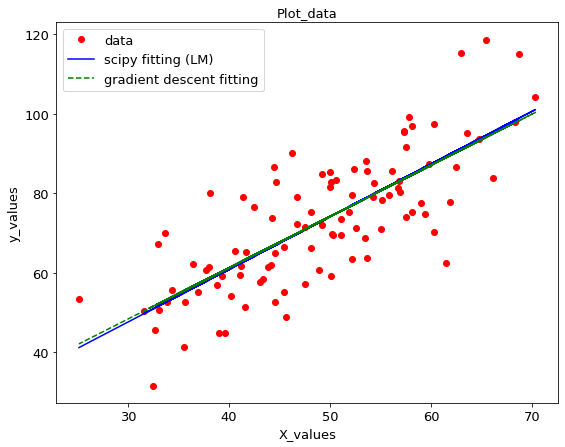

In [8]:
figure(figsize=(9,7))
plt.plot(X_data,y_data,'ro',label='data')
plt.plot(X_data,func(X_data,popt[0],popt[1]),'b-',label='scipy fitting (LM)')
plt.plot(X_data,func(X_data,theta_1,theta_0),'g--',label='gradient descent fitting')
plt.xlabel('X_values',fontsize=13)
plt.ylabel('y_values',fontsize=13)
plt.title('Plot_data',fontsize=13)
plt.tick_params(labelsize=13)
plt.legend(fontsize=13)
plt.show()

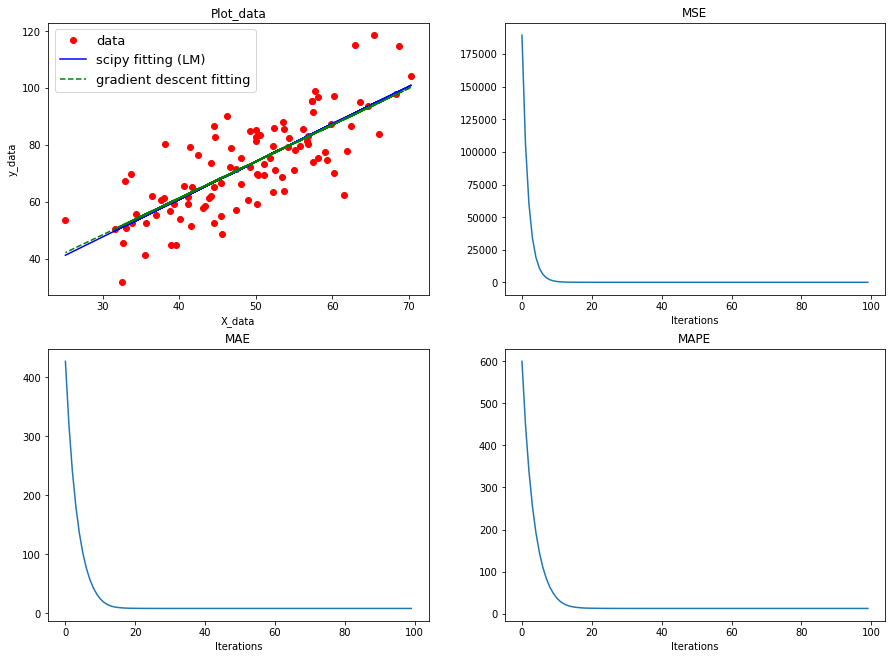

In [9]:
epochs=100
iterations=[i for i in range(epochs)]
fig, axs = plt.subplots(2,2,figsize=(15,11))
axs[0, 0].plot(X_data,y_data,'ro')
axs[0, 0].plot(X_data,func(X_data,popt[0],popt[1]),'b-')
axs[0, 0].plot(X_data,func(X_data,theta_1,theta_0),'g--')
axs[0, 0].set_title('Plot_data')
axs[0,0].set(xlabel='X_data',ylabel='y_data')
axs[0, 1].plot(iterations, MSE_value)
axs[0, 1].set_title('MSE')
axs[0,1].set(xlabel='Iterations')
axs[1, 0].plot(iterations, MAE_value)
axs[1, 0].set_title('MAE')
axs[1,0].set(xlabel='Iterations')
axs[1, 1].plot(iterations, MAPE_value,)
axs[1, 1].set_title('MAPE')
axs[1,1].set(xlabel='Iterations')
axs[0,0].legend(['data','scipy fitting (LM)','gradient descent fitting'],fontsize=13)
plt.show()

###Procedamos a cambiar el valor de la taza de aprendizaje y comparar sus efectos en la medida de MSE, MAE, MAPE

In [10]:
alphas=[0.0001,0.0007,0.00001,0.00007]
m=len(X_data)
epochs=100
its=0
MSE_value=[]
MAE_value=[]
MAPE_value=[]
thetas_0=[]
thetas_1=[]
for j in range(len(alphas)):
  tetha_0=10
  tetha_1=10
  while its<epochs:
    MSE=sum([(y_data[i]-(tetha_1*X_data[i]+tetha_0))**2 for i in range(len(X_data))])/m
    MSE_value.append(MSE)
    MAE=sum([abs(y_data[i]-(tetha_1*X_data[i]+tetha_0)) for i in range(len(X_data))])/m
    MAE_value.append(MAE)
    MAPE=(100*sum([abs((y_data[i]-(tetha_1*X_data[i]+tetha_0))/y_data[i]) for i in range(len(X_data))]))/m
    MAPE_value.append(MAPE)
    Sum1=sum([(tetha_1*X_data[i]+tetha_0)-y_data[i] for i in range(len(X_data))])
    Sum2=sum([((tetha_1*X_data[i]+tetha_0)-y_data[i])*X_data[i] for i in range(len(X_data))])
    p1=(alphas[j]*Sum1)/m
    p2=(alphas[j]*Sum2)/m
    tetha_0=tetha_0-p1
    tetha_1=tetha_1-p2
    its+=1
  its=0
  thetas_0.append(theta_0)
  thetas_1.append(theta_1)
  print('alpha=',alphas[j],'tetha_0=',tetha_0,'tetha_1=',tetha_1)

alpha= 0.0001 tetha_0= 9.82804170362346 tetha_1= 1.2863249401990895
alpha= 0.0007 tetha_0= 9.823886738614329 tetha_1= 1.286406604768573
alpha= 1e-05 tetha_0= 9.84239754726309 tetha_1= 1.9849648253040248
alpha= 7e-05 tetha_0= 9.828249697282786 tetha_1= 1.2863208934027097


In [11]:
MSE_value=np.array(MSE_value)
MSE_value=np.split(MSE_value,len(alphas))
MAE_value=np.array(MAE_value)
MAE_value=np.split(MAE_value,len(alphas))
MAPE_value=np.array(MAPE_value)
MAPE_value=np.split(MAPE_value,len(alphas))

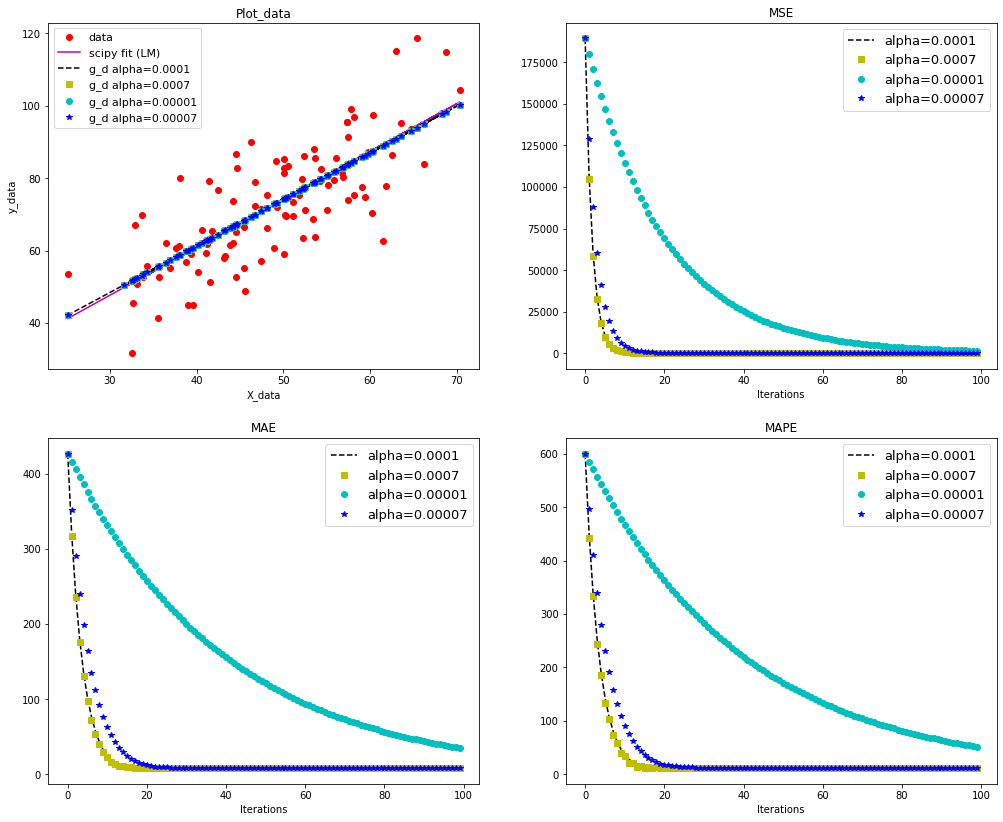

In [12]:
fig, axs = plt.subplots(2,2,figsize=(17,14))
axs[0, 0].plot(X_data,y_data,'ro')
axs[0, 0].plot(X_data,func(X_data,popt[0],popt[1]),'m-')
axs[0, 0].plot(X_data,func(X_data,thetas_1[0],thetas_0[0]),'k--')
axs[0, 0].plot(X_data,func(X_data,thetas_1[1],thetas_0[1]),'ys')
axs[0, 0].plot(X_data,func(X_data,thetas_1[2],thetas_0[2]),'co')
axs[0, 0].plot(X_data,func(X_data,thetas_1[3],thetas_0[3]),'b*')
axs[0, 0].set_title('Plot_data')
axs[0,0].set(xlabel='X_data',ylabel='y_data')
axs[0, 1].plot(iterations, MSE_value[0],'k--')
axs[0, 1].plot(iterations, MSE_value[1],'ys')
axs[0, 1].plot(iterations, MSE_value[2],'co')
axs[0, 1].plot(iterations, MSE_value[3],'b*')
axs[0, 1].set_title('MSE')
axs[0,1].set(xlabel='Iterations')
axs[1, 0].plot(iterations, MAE_value[0],'k--')
axs[1, 0].plot(iterations, MAE_value[1],'ys')
axs[1, 0].plot(iterations, MAE_value[2],'co')
axs[1, 0].plot(iterations, MAE_value[3],'b*')
axs[1, 0].set_title('MAE')
axs[1,0].set(xlabel='Iterations')
axs[1, 1].plot(iterations, MAPE_value[0],'k--')
axs[1, 1].plot(iterations, MAPE_value[1],'ys')
axs[1, 1].plot(iterations, MAPE_value[2],'co')
axs[1, 1].plot(iterations, MAPE_value[3],'b*')
axs[1, 1].set_title('MAPE')
axs[1,1].set(xlabel='Iterations')
axs[0,0].legend(['data','scipy fit (LM)','g_d alpha=0.0001','g_d alpha=0.0007','g_d alpha=0.00001','g_d alpha=0.00007'],fontsize=11)
axs[0,1].legend(['alpha=0.0001','alpha=0.0007','alpha=0.00001','alpha=0.00007'],fontsize=13)
axs[1,0].legend(['alpha=0.0001','alpha=0.0007','alpha=0.00001','alpha=0.00007'],fontsize=13)
axs[1,1].legend(['alpha=0.0001','alpha=0.0007','alpha=0.00001','alpha=0.00007'],fontsize=13)
plt.show()